In [1]:
import velocyto as vcy
import numpy as np

# Generate loom file (LINUX terminal)

In [2]:
# samtools sort -l 7 -t CB -O BAM -o /home/helene/Documents/Collins/Collins_112/Collins_112/outs/cellsorted_possorted_genome_bam.bam /home/helene/Documents/Collins/Collins_112/Collins_112/outs/possorted_genome_bam.bam
# velocyto run10x -m mm10_repeat_masker.gtf Collins_112/Collins_112/ genes.gtf

# Load data

In [3]:
filename = "/home/helene/Documents/Collins/Collins_112/velocyto/Collins_112.loom"
vlm = vcy.VelocytoLoom(filename)

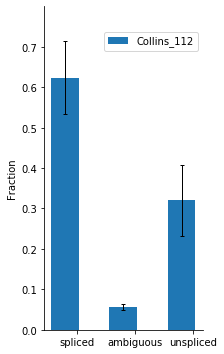

In [4]:
vlm.plot_fractions()

# Preliminary Filtering

In [5]:
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.5))

In [6]:
vlm.set_clusters(vlm.ca["Clusters"])

In [7]:
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
vlm.filter_genes(by_detection_levels=True)

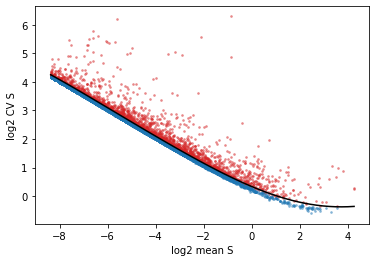

In [8]:
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
vlm.filter_genes(by_cv_vs_mean=True)

In [9]:
vlm._normalize_S(relative_size=vlm.S.sum(0),
             target_size=vlm.S.sum(0).mean())
vlm._normalize_U(relative_size=vlm.U.sum(0),
             target_size=vlm.U.sum(0).mean())

# Preparation for gamma fit

In [10]:
vlm.perform_PCA()
vlm.knn_imputation(n_pca_dims=20, k=500, balanced=True, b_sight=3000, b_maxl=1500, n_jobs=16)

# Gamma fit and extrapolation

In [11]:
vlm.fit_gammas()

In [12]:
# genes = [..., ...]
# vlm.plot_phase_portraits(genes)

In [13]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)

In [14]:
vlm.calculate_shift(assumption="constant_unspliced", delta_t=10)
vlm.extrapolate_cell_at_t(delta_t=1.)

/home/helene/Applications/anaconda3/lib/python3.7/site-packages/velocyto/analysis.py:1411: RuntimeWarning: divide by zero encountered in true_divide
  self.delta_S = self.Sx_sz * egt + (1 - egt) * Ux_szo / self.gammas[:, None] - self.Sx_sz
/home/helene/Applications/anaconda3/lib/python3.7/site-packages/velocyto/analysis.py:1411: RuntimeWarning: invalid value encountered in true_divide
  self.delta_S = self.Sx_sz * egt + (1 - egt) * Ux_szo / self.gammas[:, None] - self.Sx_sz


# Projection of velocity onto embeddings

In [15]:
from sklearn.manifold import TSNE
bh_tsne = TSNE()
vlm.ts = bh_tsne.fit_transform(vlm.pcs[:, :25])

In [18]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1, n_neighbors=3500, knn_random=True, sampled_fraction=0.5)
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=True)

/home/helene/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


MemoryError: Unable to allocate array with shape (2, 13246, 13246) and data type float32

In [17]:
vlm.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=300)
plt.figure(None,(20,10))
vlm.plot_grid_arrows(quiver_scale=0.6,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=24, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=True, scale_type="absolute")

AttributeError: 'VelocytoLoom' object has no attribute 'embedding'